In [14]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from IPython.display import display, HTML
import numpy as np
#import os
#import requests
#from ete3 import Tree, TreeStyle
import seaborn as sns

In [15]:
#CHECKM DATA FROM GALAXY
url_checkm = 'https://usegalaxy.eu/api/datasets/26c75dcccb616ac86ea31b43000ed2ed/display?to_ext=tabular'
#CHECKM2 DATA FROM GALAXY
url_checkm2 = 'https://usegalaxy.eu/api/datasets/26c75dcccb616ac80f3a06a8ad0904d7/display?to_ext=tabular'
#GTDB DATA FROM GALAXY
url_gtdb = 'https://usegalaxy.eu/api/datasets/26c75dcccb616ac895e875484621953d/display?to_ext=tsv'
#GTDB TREE FILE FORM GALAXY
gtdb_tree1 = 'https://usegalaxy.eu/api/datasets/26c75dcccb616ac87be4e0c1ed43f380/display?to_ext=newick'
gtdb_tree2 = 'https://usegalaxy.eu/api/datasets/26c75dcccb616ac856cba0214e17b075/display?to_ext=newick'
gtdb_tree3 = 'https://usegalaxy.eu/api/datasets/26c75dcccb616ac8d3925c10a0717671/display?to_ext=newick'
gtdb_tree4 = 'https://usegalaxy.eu/api/datasets/26c75dcccb616ac88aeaaa955d7e47a3/display?to_ext=newick'
gtdb_tree5 = 'https://usegalaxy.eu/api/datasets/26c75dcccb616ac8d6540322dbd46c8a/display?to_ext=newick'
gtdb_tree6 = 'https://usegalaxy.eu/api/datasets/26c75dcccb616ac8b260ceae942b2e9c/display?to_ext=newick'
#DREP DATA FROM GALAXY
drep_cdb = 'https://usegalaxy.eu/api/datasets/26c75dcccb616ac88b38f3668ceee538/display?to_ext=csv'
#COVERM LINKS
coverm_sample_1 = 'https://usegalaxy.eu/api/datasets/26c75dcccb616ac87a0137b88d55f3ee/display?to_ext=tabular'
coverm_sample_2 = 'https://usegalaxy.eu/api/datasets/26c75dcccb616ac85ef07ff9c562fcb9/display?to_ext=tabular'
coverm_sample_3 = 'https://usegalaxy.eu/api/datasets/26c75dcccb616ac8291512156b45edfa/display?to_ext=tabular'

In [16]:
# DOWNLOAD FILES IF NEEDED

#need_to_download = [gtdb_tree1, gtdb_tree2, gtdb_tree3, gtdb_tree4, gtdb_tree5, gtdb_tree6]

#for i, url in enumerate(need_to_download):

    #local_filename = f"gtdb_tree{i}.nwk"

    #print(f"File exists? {os.path.exists(local_filename)}")

    #if not os.path.exists(local_filename):
        #response = requests.get(url)
        #with open(local_filename, "wb") as f:
            #f.write(response.content)
        #print(f'File was downloaded and saved as {local_filename}')


In [17]:
df_checkm = pd.read_csv(url_checkm, sep='\t')

print(df_checkm.columns)
print(df_checkm.shape)

html_checkm = df_checkm.to_html(index=False)

scrollable_html = f'''
<div style='height: 400px; overflow: auto;'>
    {html_checkm}
</div>
'''
display(HTML(scrollable_html))

df_checkm2 = pd.read_csv(url_checkm2, sep='\t')

print(df_checkm2.columns)
print(df_checkm2.shape)

html_checkm2 = df_checkm2.to_html(index=False)

scrollable_html = f'''
<div style='height: 400px; overflow: auto;'>
    {html_checkm2}
</div>
'''
display(HTML(scrollable_html))

df_gtdb = pd.read_csv(url_gtdb, sep='\t')

print(df_gtdb.columns)
print(df_gtdb.shape)

html_gtdb = df_gtdb.to_html(index=False)

scrollable_html = f'''
<div style='height: 400px; overflow: auto;'>
    {html_gtdb}
</div>
'''
display(HTML(scrollable_html))

df_drep = pd.read_csv(drep_cdb, sep=',')

print(df_drep.columns)
print(df_drep.shape)

html_drep = df_drep.to_html(index=False)

scrollable_html = f'''
<div style='height: 400px; overflow: auto;'>
    {html_drep}
</div>
'''
display(HTML(scrollable_html))

Index(['Bin Id', 'Marker lineage', '# genomes', '# markers', '# marker sets',
       '0', '1', '2', '3', '4', '5+', 'Completeness', 'Contamination',
       'Strain heterogeneity'],
      dtype='object')
(134, 14)


Bin Id,Marker lineage,# genomes,# markers,# marker sets,0,1,2,3,4,5+,Completeness,Contamination,Strain heterogeneity
SRR22878281.fastq_bin_1030637.fasta,k__Bacteria (UID1453),901,171,117,2,165,4,0,0,0,98.29,1.99,50.00
SRR22878281.fastq_bin_1047037.fasta,f__Rhodobacteraceae (UID3375),32,625,283,71,545,9,0,0,0,88.35,1.69,66.67
SRR22878281.fastq_bin_1048668.fasta,p__Proteobacteria (UID3880),1495,261,164,5,254,2,0,0,0,96.95,1.22,50.00
SRR22878281.fastq_bin_1065179.fasta,k__Bacteria (UID2982),88,229,147,12,212,4,1,0,0,92.38,3.20,0.00
SRR22878281.fastq_bin_1069559.fasta,k__Bacteria (UID1453),901,171,117,15,154,2,0,0,0,92.59,1.28,0.00
SRR22878281.fastq_bin_1070024.fasta,k__Bacteria (UID1453),901,171,117,13,158,0,0,0,0,90.31,0.00,0.00
SRR22878281.fastq_bin_1078928.fasta,p__Cyanobacteria (UID2192),79,584,458,64,516,4,0,0,0,93.46,0.73,0.00
SRR22878281.fastq_bin_1177133.fasta,k__Bacteria (UID1453),901,171,117,13,157,1,0,0,0,90.17,0.85,0.00
SRR22878281.fastq_bin_1190068.fasta,o__Sphingomonadales (UID3310),26,569,293,76,481,12,0,0,0,90.62,2.34,33.33
SRR22878281.fastq_bin_1223417.fasta,k__Bacteria (UID3187),2258,188,117,46,140,1,1,0,0,74.81,0.95,0.00


Index(['Name', 'Completeness', 'Contamination', 'Completeness_Model_Used',
       'Translation_Table_Used', 'Coding_Density', 'Contig_N50',
       'Average_Gene_Length', 'Genome_Size', 'GC_Content',
       'Total_Coding_Sequences', 'Total_Contigs', 'Max_Contig_Length',
       'Additional_Notes'],
      dtype='object')
(134, 14)


Name,Completeness,Contamination,Completeness_Model_Used,Translation_Table_Used,Coding_Density,Contig_N50,Average_Gene_Length,Genome_Size,GC_Content,Total_Coding_Sequences,Total_Contigs,Max_Contig_Length,Additional_Notes
SRR22878281.fastq_bin_1030637.fasta,95.14,1.29,Gradient Boost (General Model),11,0.930,52200,325.773804,4867065,0.62,4642,152,183065,NaN
SRR22878281.fastq_bin_1047037.fasta,88.64,0.91,Neural Network (Specific Model),11,0.887,16112,303.633941,3654981,0.60,3565,328,96306,NaN
SRR22878281.fastq_bin_1048668.fasta,99.72,0.06,Gradient Boost (General Model),11,0.887,62436,316.796245,2677092,0.43,2503,78,190839,NaN
SRR22878281.fastq_bin_1065179.fasta,86.85,0.20,Gradient Boost (General Model),11,0.926,9080,353.520982,5913631,0.64,5171,865,38672,NaN
SRR22878281.fastq_bin_1069559.fasta,88.48,1.66,Gradient Boost (General Model),11,0.935,34002,320.358221,3943993,0.62,3844,176,77593,NaN
SRR22878281.fastq_bin_1070024.fasta,88.74,2.60,Gradient Boost (General Model),11,0.927,35331,326.949640,5282451,0.62,5004,221,108792,NaN
SRR22878281.fastq_bin_1078928.fasta,86.75,2.77,Neural Network (Specific Model),11,0.821,69230,311.098171,4908150,0.37,4319,138,242513,NaN
SRR22878281.fastq_bin_1177133.fasta,92.39,0.63,Gradient Boost (General Model),11,0.932,28025,319.719585,3267700,0.60,3181,164,82825,NaN
SRR22878281.fastq_bin_1190068.fasta,89.25,1.72,Neural Network (Specific Model),11,0.916,12519,296.620232,2922806,0.57,3015,342,67190,NaN
SRR22878281.fastq_bin_1223417.fasta,77.49,1.77,Gradient Boost (General Model),11,0.890,3747,254.561266,3168983,0.36,3697,992,23988,NaN


Index(['user_genome', 'classification', 'closest_genome_reference',
       'closest_genome_reference_radius', 'closest_genome_taxonomy',
       'closest_genome_ani', 'closest_genome_af',
       'closest_placement_reference', 'closest_placement_radius',
       'closest_placement_taxonomy', 'closest_placement_ani',
       'closest_placement_af', 'pplacer_taxonomy', 'classification_method',
       'note',
       'other_related_references(genome_id,species_name,radius,ANI,AF)',
       'msa_percent', 'translation_table', 'red_value', 'warnings'],
      dtype='object')
(134, 20)


user_genome,classification,closest_genome_reference,closest_genome_reference_radius,closest_genome_taxonomy,closest_genome_ani,closest_genome_af,closest_placement_reference,closest_placement_radius,closest_placement_taxonomy,closest_placement_ani,closest_placement_af,pplacer_taxonomy,classification_method,note,"other_related_references(genome_id,species_name,radius,ANI,AF)",msa_percent,translation_table,red_value,warnings
SRR22878281_fastq_bin_1030637_fasta,d__Bacteria;p__Actinomycetota;c__Acidimicrobiia;o__Acidimicrobiales;f__SZUA-35;g__CALEWY01;s__,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,d__Bacteria;p__Actinomycetota;c__Acidimicrobiia;o__Acidimicrobiales;f__SZUA-35;g__CALEWY01;s__,taxonomic classification fully defined by topology,classification based on placement in class-level tree,NaN,92.31,11,0.98824,NaN
SRR22878281_fastq_bin_1047037_fasta,d__Bacteria;p__Pseudomonadota;c__Alphaproteobacteria;o__Rhodobacterales;f__Rhodobacteraceae;g__Pseudophaeobacter;s__,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,d__Bacteria;p__Pseudomonadota;c__Alphaproteobacteria;o__Rhodobacterales;f__Rhodobacteraceae;g__Pseudophaeobacter;s__,taxonomic classification defined by topology and ANI,classification based on placement in class-level tree,"GCF_000473205.1, s__Pseudophaeobacter arcticus, 95.0, 84.77, 0.368; GCA_025163595.1, s__Pseudophaeobacter sp905479575, 95.0, 84.65, 0.368; GCF_900313025.1, s__Pseudophaeobacter sp900313025, 95.0, 84.58, 0.372; GCF_001294455.1, s__Pseudophaeobacter sp001294455, 95.0, 83.77, 0.331; GCF_000152965.1, s__Pseudophaeobacter sp000152965, 95.0, 83.31, 0.271; GCF_001457775.1, s__Pseudophaeobacter sp001457775, 95.0, 82.51, 0.211; GCF_029697505.1, s__Pseudophaeobacter sp029697505, 95.0, 82.31, 0.226; GCA_015665415.1, s__Pseudophaeobacter sp015665415, 95.0, 82.29, 0.21; GCF_002087335.1, s__Pseudophaeobacter leonis, 95.0, 82.25, 0.216; GCF_021228235.1, s__Pseudophaeobacter flagellatus, 95.0, 82.21, 0.231; GCA_913054455.1, s__Pseudophaeobacter sp913054455, 95.0, 82.14, 0.212",81.03,11,0.99619,NaN
SRR22878281_fastq_bin_1048668_fasta,d__Bacteria;p__Pseudomonadota;c__Gammaproteobacteria;o__Arenicellales;f__Arenicellaceae;g__Arenicella;s__,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,d__Bacteria;p__Pseudomonadota;c__Gammaproteobacteria;o__Arenicellales;f__Arenicellaceae;g__Arenicella;s__,taxonomic classification fully defined by topology,classification based on placement in class-level tree,NaN,98.47,11,0.94688,NaN
SRR22878281_fastq_bin_1065179_fasta,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Verrucomicrobiales;f__DEV007;g__JAUIGD01;s__,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Verrucomicrobiales;f__DEV007;g__JAUIGD01;s__,taxonomic novelty determined using RED,classification based on placement in class-level tree,NaN,82.20,11,0.87982,NaN
SRR22878281_fastq_bin_1069559_fasta,d__Bacteria;p__Actinomycetota;c__Acidimicrobiia;o__Acidimicrobiales;f__SHLQ01;g__SHLQ01;s__,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,d__Bacteria;p__Actinomycetota;c__Acidimicrobiia;o__Acidimicrobiales;f__SHLQ01;g__SHLQ01;s__,taxonomic classification fully defined by topology,classification based on placement in class-level tree,NaN,90.72,11,0.97178,NaN
SRR22878281_fastq_bin_1070024_fasta,d__Bacteria;p__Actinomycetota;c__Acidimicrobiia;o__Acidimicrobiales;f__UBA10347;g__UBA10347;s__,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,d__Bacteria;p__Actinomycetota;c__Acidimicrobiia;o__Acidimicrobiales;f__UBA10347;g__UBA10347;s__,taxonomic classification fully defined by topology,classification based on placement in class-level tree,NaN,89.08,11,0.95480,NaN
SRR22878281_fastq_bin_1078928_fasta,d__Bacteria;p__Cyanobacteriota;c__Cyanobacteriia;o__Cyanobacteriales;f__Xenococcaceae;g__Waterburya;s__,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,d__Bacteria;p__Cyanobacteriota;c__Cyanobacteriia;o__Cyanobacteriales;f__Xenococcaceae;g__Waterburya;s__,taxonomic classification fully defined by topology,classification based on placem

Index(['genome', 'secondary_cluster', 'threshold', 'cluster_method',
       'comparison_algorithm', 'primary_cluster'],
      dtype='object')
(155, 6)


genome,secondary_cluster,threshold,cluster_method,comparison_algorithm,primary_cluster
SRR22878281.fastq_bin_1069559.fasta,1_0,0.05,average,ANImf,1
SRR22878281.fastq_bin_1177133.fasta,2_0,0.05,average,ANImf,2
SRR22878281.fastq_bin_1070024.fasta,3_0,0.05,average,ANImf,3
SRR22878281.fastq_bin_952057.fasta,4_0,0.05,average,ANImf,4
SRR22878281.fastq_bin_6555.fasta,5_0,0.05,average,ANImf,5
SRR22878281.fastq_bin_1223417.fasta,6_0,0.05,average,ANImf,6
SRR22878281.fastq_bin_1734399.fasta,7_0,0.05,average,ANImf,7
SRR22878281.fastq_bin_1506086.fasta,8_0,0.05,average,ANImf,8
SRR22878281.fastq_bin_870174.fasta,9_0,0.05,average,ANImf,9
SRR22878281.fastq_bin_1437311.fasta,10_0,0.05,average,ANImf,10


   Completeness (%)  Contamination (%)
0             98.29               1.99
1             88.35               1.69
2             96.95               1.22
3             92.38               3.20
4             92.59               1.28


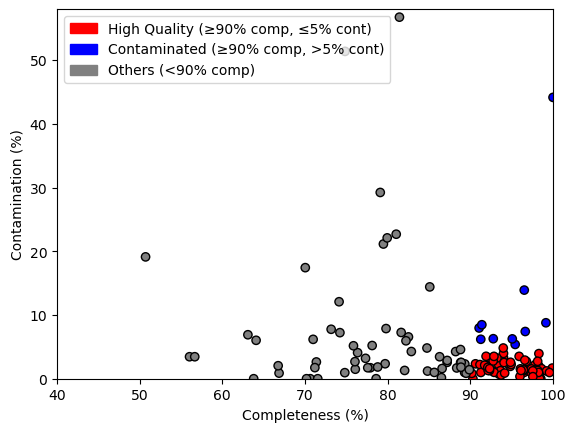

In [18]:
#CONTAMINATION x COMPLETNESS

plot_df = df_checkm.loc[:,['Completeness', 'Contamination']]

plot_df.rename(columns={'Completeness': 'Completeness (%)', 'Contamination': 'Contamination (%)'}, inplace=True)

print(plot_df.head())


completness = 90.0
contamination = 5.0

conditions = [(plot_df['Completeness (%)'] >= completness) & (plot_df['Contamination (%)'] <= contamination), (plot_df['Completeness (%)'] >= completness) & (plot_df['Contamination (%)'] > contamination)]

choices = ['red', 'blue']

colors = np.select(conditions, choices, default='grey')

plt.scatter(x=plot_df['Completeness (%)'], y=plot_df['Contamination (%)'], c=colors, edgecolor='black')

plt.xlim(max(math.floor((plot_df['Completeness (%)'].min() - 10) / 10) * 10 ,0), 100)
plt.ylim(0, min(math.ceil(plot_df['Contamination (%)'].max() + 1), 100))

plt.xlabel('Completeness (%)')
plt.ylabel('Contamination (%)')

legend_patches = [
    mpatches.Patch(color='red', label='High Quality (≥90% comp, ≤5% cont)'),
    mpatches.Patch(color='blue', label='Contaminated (≥90% comp, >5% cont)'),
    mpatches.Patch(color='grey', label='Others (<90% comp)')
]
plt.legend(handles=legend_patches, loc='best')

plt.show()

   N50(kbp)
0    52.200
1    16.112
2    62.436
3     9.080
4    34.002


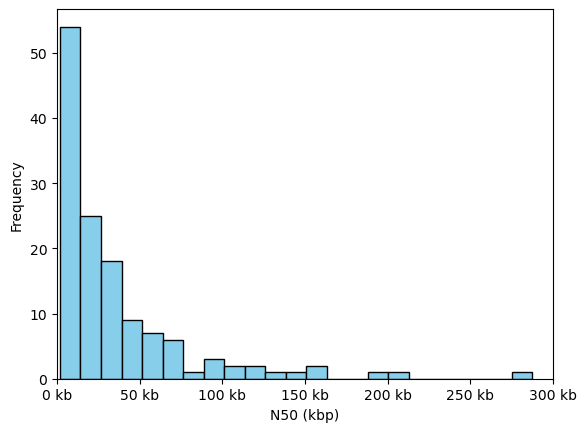

In [19]:
#N50 HISTOGRAM

his_df = df_checkm2.loc[:,['Contig_N50']]

his_df.rename(columns={'Contig_N50': 'N50(kbp)'}, inplace=True)

his_df = his_df / 1000

print(his_df.head())

plt.hist(his_df, bins='auto', color='skyblue', edgecolor='black')

plt.xlim(0, his_df['N50(kbp)'].max())

plt.xlabel('N50 (kbp)')
plt.ylabel('Frequency')

plt.xticks(plt.xticks()[0], [f'{int(x)} kb' for x in plt.xticks()[0]])

plt.show()

   # Contig
0       152
1       328
2        78
3       865
4       176


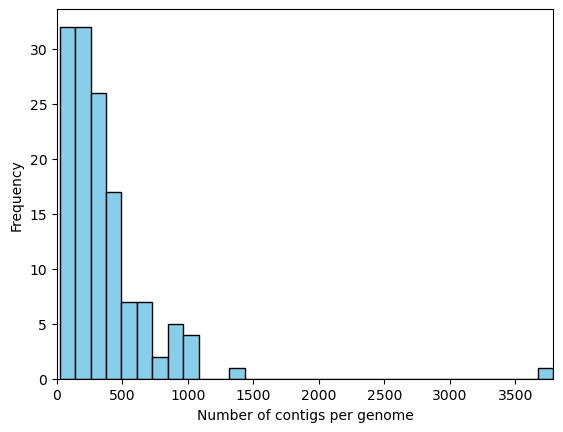

In [20]:
#NUMBER OF CONTIGS HISTOGRAM

his_df = df_checkm2.loc[:,['Total_Contigs']]

his_df.rename(columns={'Total_Contigs': '# Contig'}, inplace=True)

print(his_df.head())

plt.hist(his_df, bins='auto', color='skyblue', edgecolor='black')

plt.xlim(0, his_df['# Contig'].max())

plt.xlabel('Number of contigs per genome')
plt.ylabel('Frequency')

plt.show()

                                   Bin    N50  Total length Assembly  \
0  SRR22878281.fastq_bin_1030637.fasta  52200                4867065   
1  SRR22878281.fastq_bin_1047037.fasta  16112                3654981   
2  SRR22878281.fastq_bin_1048668.fasta  62436                2677092   
3  SRR22878281.fastq_bin_1065179.fasta   9080                5913631   
4  SRR22878281.fastq_bin_1069559.fasta  34002                3943993   

   Longest Contig  Coding Density  
0          183065           0.930  
1           96306           0.887  
2          190839           0.887  
3           38672           0.926  
4           77593           0.935  


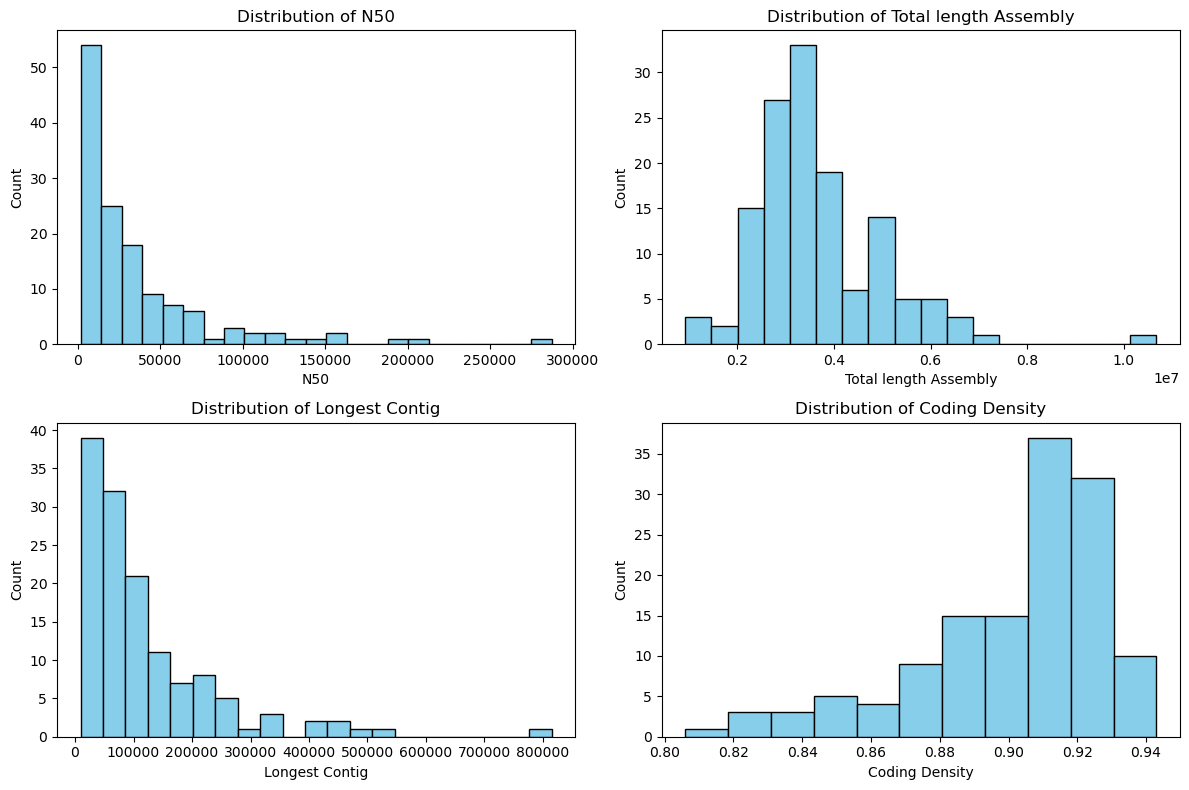

In [21]:
#N50 VALUES x TOTAL LENGTH OF THE ASSEMLBY x LENGTH OF THE LONGEST CONTIG x CODDING DENSITY

plot_df = df_checkm2.loc[:,['Name', 'Contig_N50', 'Genome_Size', 'Max_Contig_Length', 'Coding_Density']]

plot_df.rename(columns={'Name': 'Bin', 'Genome_Size': 'Total length Assembly', 'Contig_N50' : 'N50', 'Max_Contig_Length': 'Longest Contig', 'Coding_Density': 'Coding Density'}, inplace=True)

print(plot_df.head())


metrics = ['N50','Total length Assembly','Longest Contig','Coding Density']

fig, axes = plt.subplots(2, 2, figsize=(12,8))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    axes[i].hist(plot_df[metric], bins='auto', color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution of {metric}')
    axes[i].set_xlabel(metric)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

#NORMALIZED VALUES

#df_norm = plot_df.copy()
#df_norm[metrics] = plot_df[metrics].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

#fig, axes = plt.subplots(2, 2, figsize=(12,8))
#axes = axes.flatten()

#for i, metric in enumerate(metrics):
    #axes[i].hist(df_norm[metric], bins=20, color='skyblue', edgecolor='black')
    #axes[i].set_title(f'Distribution of {metric} normalized')
    #axes[i].set_xlabel(metric)
    #axes[i].set_ylabel('Count')


#plt.tight_layout()
#plt.show()

                                   Bin             Phylum
0  SRR22878281_fastq_bin_1030637_fasta     Actinomycetota
1  SRR22878281_fastq_bin_1047037_fasta     Pseudomonadota
2  SRR22878281_fastq_bin_1048668_fasta     Pseudomonadota
3  SRR22878281_fastq_bin_1065179_fasta  Verrucomicrobiota
4  SRR22878281_fastq_bin_1069559_fasta     Actinomycetota


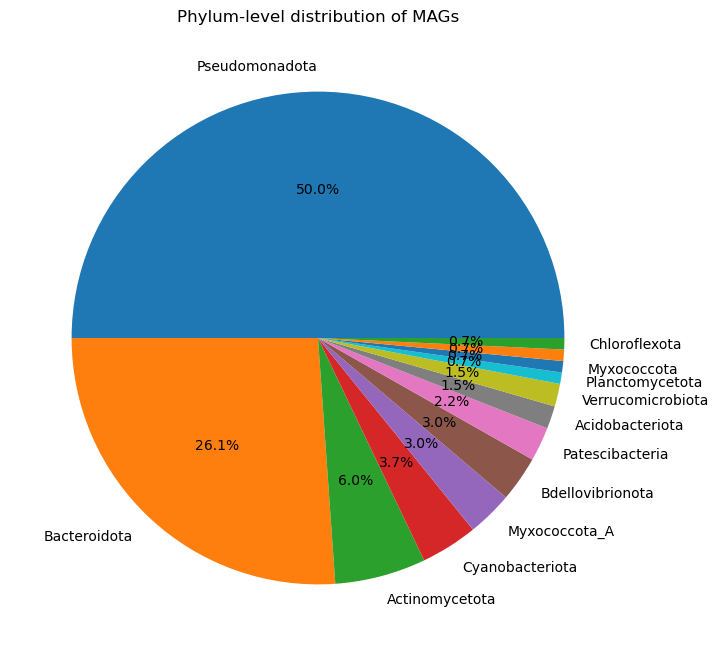

In [22]:
# Phylum-level distribution of MAGs

plot_df = df_gtdb.loc[:,['user_genome', 'classification']]

plot_df.rename(columns={'user_genome': 'Bin', 'classification': 'Phylum'}, inplace=True)

plot_df['Phylum'] = (
    plot_df['Phylum']
    .str.split(';')
    .str[1]
    .str.replace('p__', '', regex=False)
)

plot_df['Phylum'] = plot_df['Phylum'].fillna('Unclassified')

print(plot_df.head())

phylum_counts = plot_df["Phylum"].value_counts()

plt.figure(figsize=(8,8))
phylum_counts.plot(kind="pie", autopct='%1.1f%%')
plt.ylabel("")
plt.title("Phylum-level distribution of MAGs")
plt.show()

#subtrees = [f"gtdb_tree{i}.nwk" for i in range(len(need_to_download))]

#for tfile in subtrees:
    #t = Tree(tfile, format=1, quoted_node_names=True)
    #if full_tree is None:
        #full_tree = t
    #else:
        #full_tree.add_child(t)

#full_tree.write(format=1, outfile="merged_tree.nwk")


#full_tree = Tree("merged_tree.nwk", format=1, quoted_node_names=True)

#ts = TreeStyle()
#ts.mode = "c"
#ts.show_leaf_name = True
#ts.show_branch_length = False
#ts.show_branch_support = True

#full_tree.render("full_tree.png", tree_style=ts)

                                   Bin Cluster
0  SRR22878281.fastq_bin_1069559.fasta     1_0
1  SRR22878281.fastq_bin_1177133.fasta     2_0
2  SRR22878281.fastq_bin_1070024.fasta     3_0
3   SRR22878281.fastq_bin_952057.fasta     4_0
4     SRR22878281.fastq_bin_6555.fasta     5_0


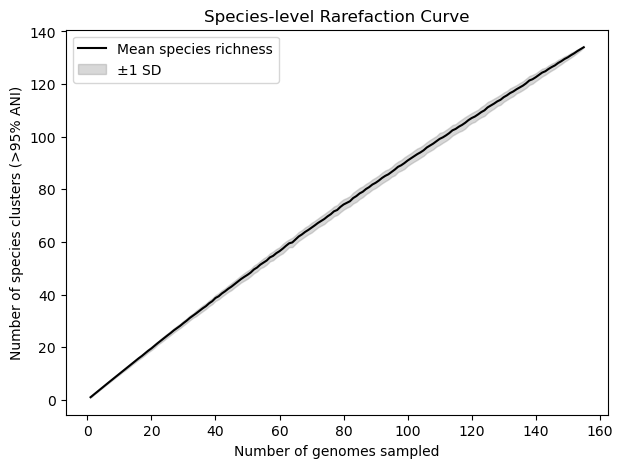

In [23]:
#Species-level (>95% ANI) rarefaction curve

plot_df = df_drep.loc[:,['genome', 'secondary_cluster']]

plot_df.rename(columns={'genome': 'Bin', 'secondary_cluster': 'Cluster'}, inplace=True)

print(plot_df.head())

def rarefaction_curve(df, n_iter=100, step=1):
    genomes = df["Bin"].tolist()
    species_map = dict(zip(df["Bin"], df["Cluster"]))
    
    max_depth = len(genomes)
    depths = range(step, max_depth+1, step)
    results = []
    
    for depth in depths:
        species_counts = []
        for _ in range(n_iter):
            subsample = np.random.choice(genomes, size=depth, replace=False)
            clusters = set(species_map[g] for g in subsample)
            species_counts.append(len(clusters))
        results.append({
            "depth": depth,
            "mean_species": np.mean(species_counts),
            "std_species": np.std(species_counts)
        })
    
    return pd.DataFrame(results)


results = rarefaction_curve(plot_df, n_iter=200, step=1)


plt.figure(figsize=(7,5))
plt.plot(results["depth"], results["mean_species"], label="Mean species richness", color="black")
plt.fill_between(results["depth"],
                 results["mean_species"]-results["std_species"],
                 results["mean_species"]+results["std_species"],
                 color="gray", alpha=0.3, label="±1 SD")
plt.xlabel("Number of genomes sampled")
plt.ylabel("Number of species clusters (>95% ANI)")
plt.title("Species-level Rarefaction Curve")
plt.legend()
plt.show()

                               SRR22878281  SRR22878282  SRR22878283
Genome                                                              
SRR22878281.fastq_bin_1030637     0.274132     0.000000     0.000000
SRR22878281.fastq_bin_1047037     0.199115     0.007188     0.009929
SRR22878281.fastq_bin_1048668     0.753555     0.000000     0.000000
SRR22878281.fastq_bin_1065179     0.131559     0.000000     0.000000
SRR22878281.fastq_bin_1069559     0.208079     0.000000     0.000000


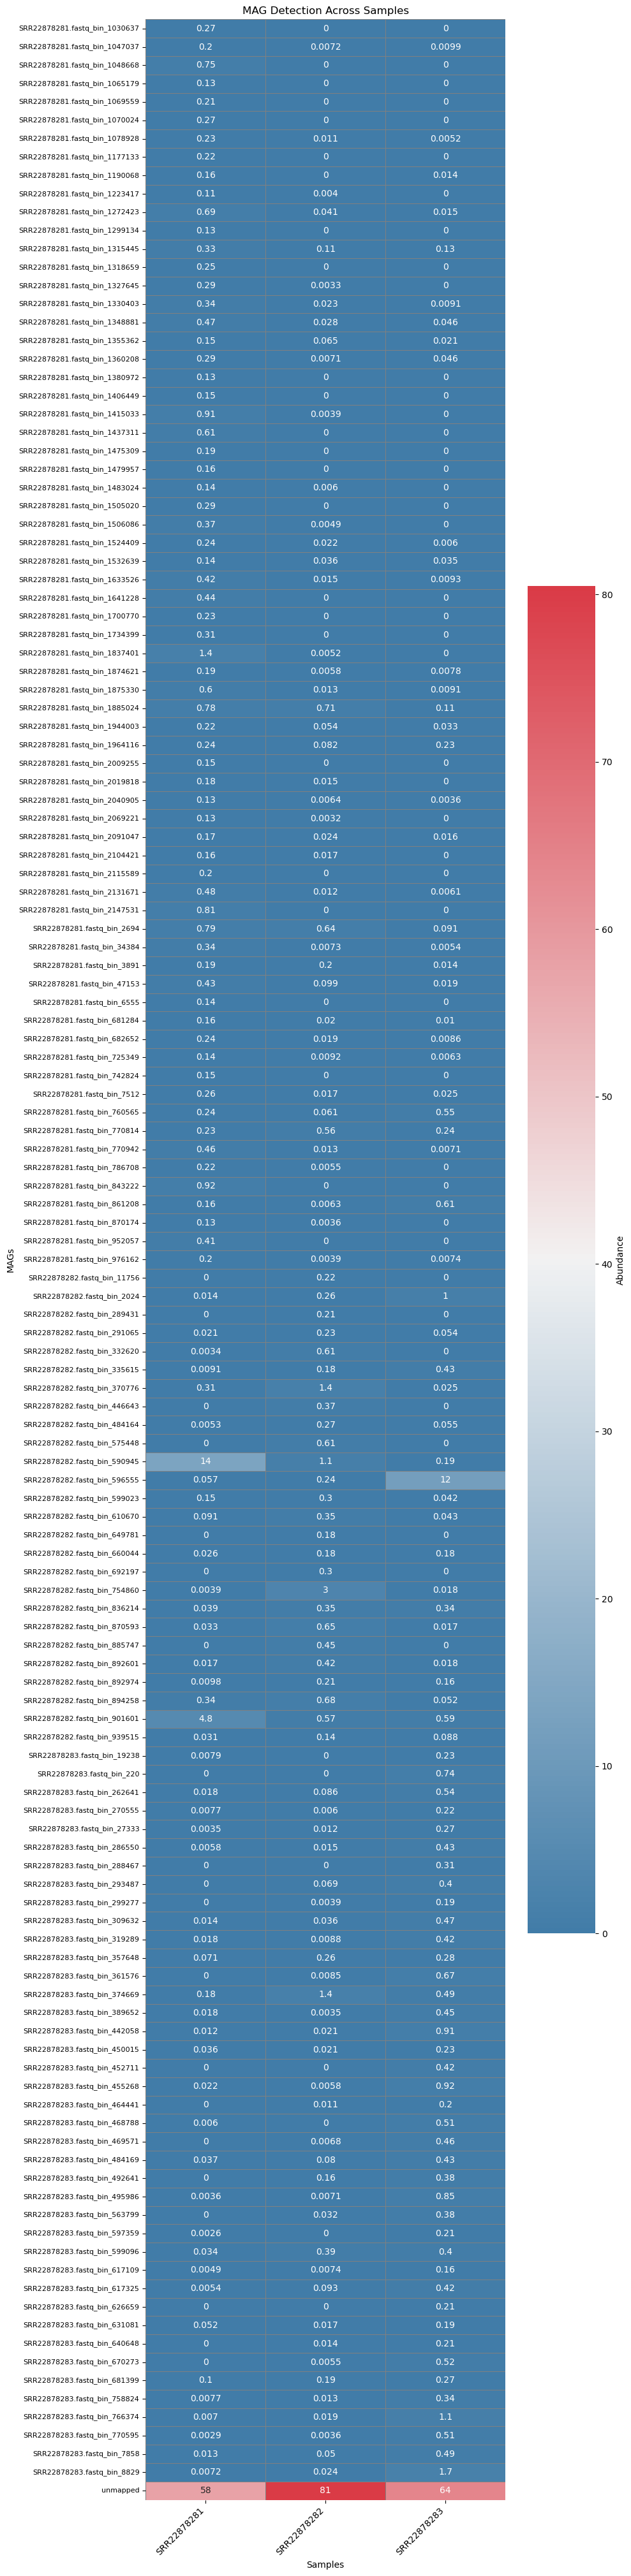

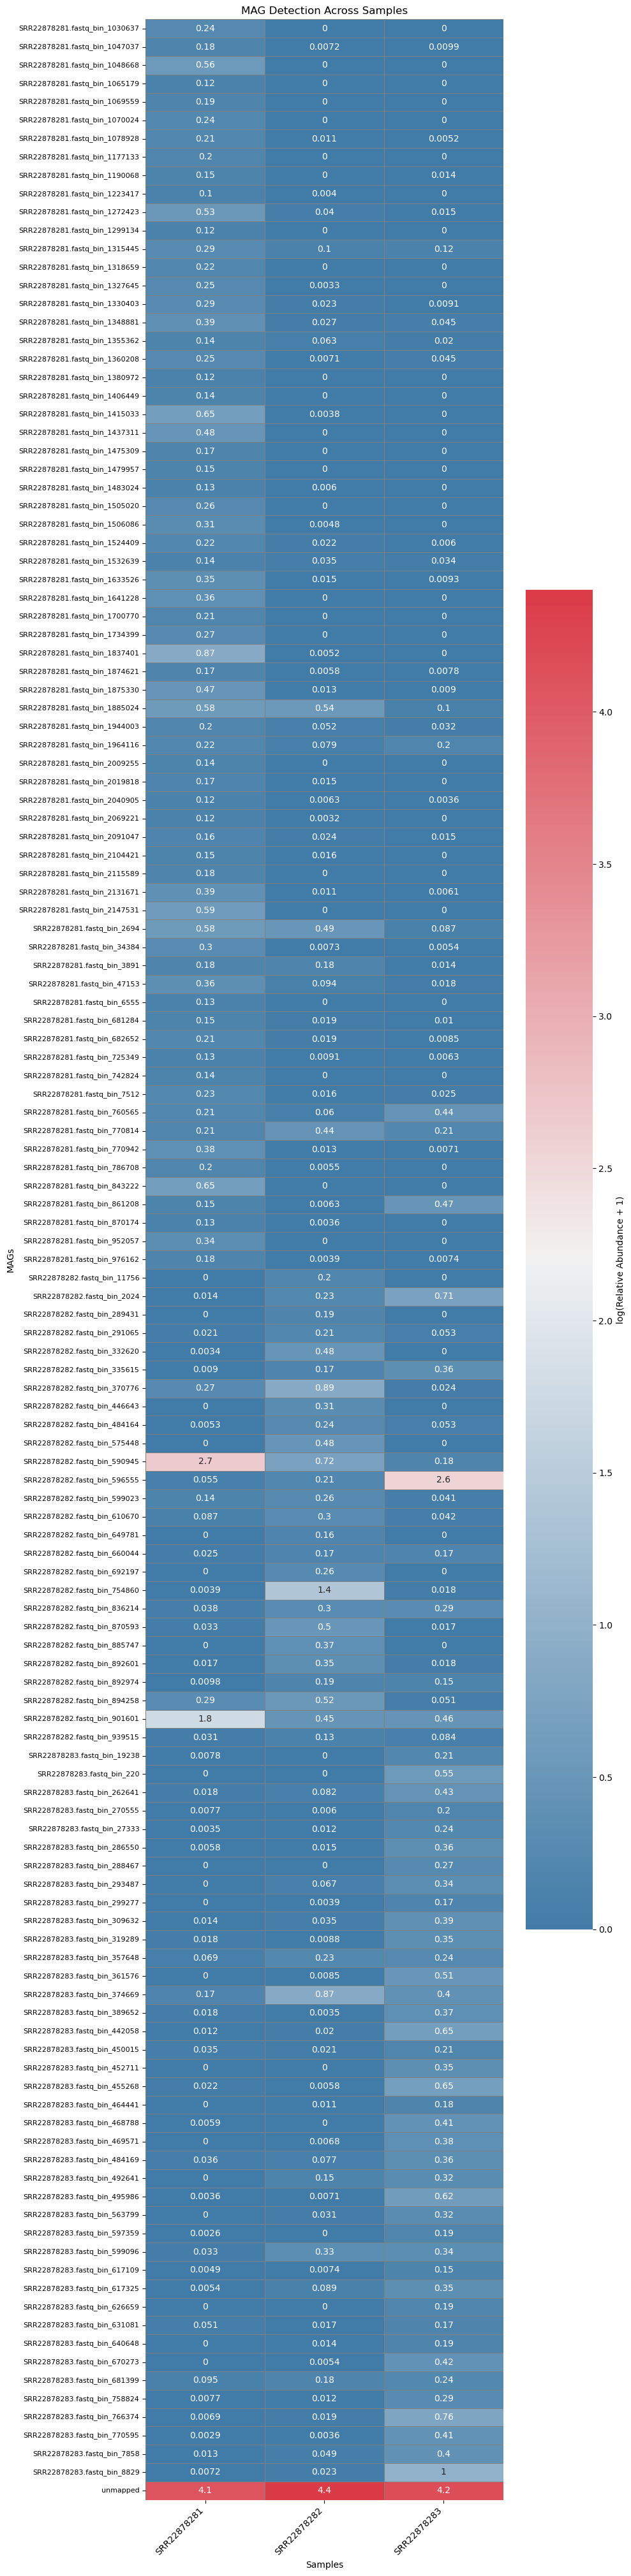

In [42]:
#HEAT MAP

df_sample_1 = pd.read_csv(coverm_sample_1, sep='\t')
df_sample_2 = pd.read_csv(coverm_sample_2, sep='\t')
df_sample_3 = pd.read_csv(coverm_sample_3, sep='\t')

merged = df_sample_1.merge(df_sample_2, on='Genome', how='outer').merge(df_sample_3, on='Genome', how='outer')

merged.columns = merged.columns.str.split(".").str[0]

merged = merged.set_index("Genome")
merged = merged.apply(pd.to_numeric, errors="coerce")
merged = merged.fillna(0)

print(merged.head())

num_bins, num_samples = merged.shape

plt.figure(figsize=(max(10, num_samples*1.2), max(6, num_bins*0.3)))

sns.heatmap(merged, cmap= sns.diverging_palette(240, 10, as_cmap=True), annot=True, cbar_kws={'label': 'Abundance'}, linewidths=0.5,linecolor='gray')

plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(rotation=0, fontsize=8)
plt.title("MAG Detection Across Samples")
plt.xlabel("Samples")
plt.ylabel("MAGs")
plt.tight_layout()
plt.show()

plt.figure(figsize=(max(10, num_samples*1.2), max(6, num_bins*0.3)))

sns.heatmap(np.log1p(merged), cmap= sns.diverging_palette(240, 10, as_cmap=True), annot=True, cbar_kws={'label': 'log(Relative Abundance + 1)'}, linewidths=0.5,linecolor='gray')

plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(rotation=0, fontsize=8)
plt.title("MAG Detection Across Samples")
plt.xlabel("Samples")
plt.ylabel("MAGs")
plt.tight_layout()
plt.show()